<a href="https://colab.research.google.com/github/davidt964/Hopf-Bifurcation-Project/blob/main/HopfBifurcation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: David Tran \\
UCLA ID: 205-492-874 \\
Project 2: Hopf Bifurcations

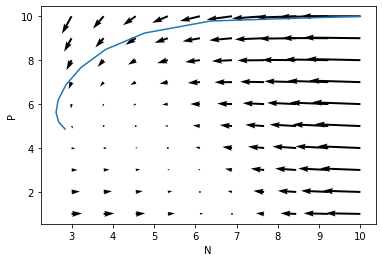

In [ ]:
#Problem 1
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib.widgets import Slider

N,P = np.meshgrid(np.linspace(3,10,10), np.linspace(1,10,10))
t = np.linspace(3,10,10)

r1 = 1
r2 = 0.1
k = 7
d = 1
j = 1
w = 0.4

Nx_min = 3
Nx_max = 10
Py_min = 1
Py_max = 10

def HTmodel(x,t):
  N = x[0]
  P = x[1]                                        
  Np = r1 * N * (1 - (N/k)) - (w * N)/(d + N) * P
  Pp = r2 * P * (1 - (j * P) / N)
  z = [Np, Pp]
  return z

y0 = [10,10]
sol = odeint(HTmodel,y0,t)

Np = r1 * N * (1 - (N/k)) - (w * N)/(d + N) * P
Pp = r2 * P * (1 - (j * P) / N)

plt.quiver(N,P,Np,Pp)
plt.plot(sol[:,0],sol[:,1])
plt.xlabel("N")
plt.ylabel("P")
plt.show()

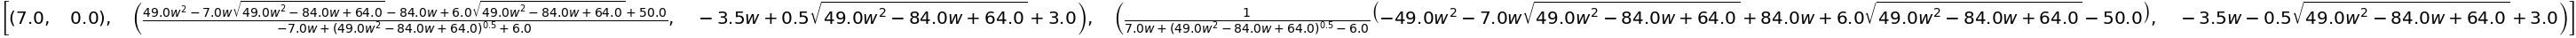

In [ ]:
#Problem 2
import numpy as np
import matplotlib.pyplot as plt
from sympy.solvers import solve
from sympy import Symbol, init_printing
init_printing(use_unicode=True)

r1 = 1
r2 = 0.1
k = 7
d = 1
j = 1

N = Symbol('N')
P = Symbol('P')
w = Symbol('w')

Np = r1 * N * (1 - (N/k)) - (w * N)/(d + N) * P
Pp = r2 * P * (1 - (j * P) / N)

eqsoln = solve([Np,Pp],(N,P))
eqsoln

In [ ]:
#Problem 3
bioEqN = eqsoln[1][0]
bioEqP = eqsoln[1][1]
bioEqN
bioEqP

In [ ]:
#Problem 4
from sympy import Symbol, init_printing, Matrix
init_printing(use_unicode=True)

mat = Matrix([Np,Pp])
vars = Matrix([N,P])
jacb = mat.jacobian(vars)
jacb

⎡ N⋅P⋅w     2⋅N    P⋅w          -N⋅w    ⎤
⎢──────── - ─── - ───── + 1     ─────   ⎥
⎢       2    7    N + 1         N + 1   ⎥
⎢(N + 1)                                ⎥
⎢                                       ⎥
⎢               2                       ⎥
⎢          0.1⋅P                   0.2⋅P⎥
⎢          ──────            0.1 - ─────⎥
⎢             2                      N  ⎥
⎣            N                          ⎦

In [ ]:
#Problem 5
eqn = jacb.subs([(N,bioEqN), (P,bioEqP)]);
eqn

⎡                            ⎛                _________________________      ⎞
⎢                            ⎜               ╱       2                       ⎟
⎢                          w⋅⎝-3.5⋅w + 0.5⋅╲╱  49.0⋅w  - 84.0⋅w + 64.0  + 3.0⎠
⎢- ───────────────────────────────────────────────────────────────────────────
⎢                         _________________________                   ________
⎢            2           ╱       2                                   ╱       2
⎢      49.0⋅w  - 7.0⋅w⋅╲╱  49.0⋅w  - 84.0⋅w + 64.0  - 84.0⋅w + 6.0⋅╲╱  49.0⋅w 
⎢  1 + ───────────────────────────────────────────────────────────────────────
⎢                                                                  0.5        
⎢                                         ⎛      2                ⎞           
⎢                                -7.0⋅w + ⎝49.0⋅w  - 84.0⋅w + 64.0⎠    + 6.0  
⎢                                                                             
⎢                                                   

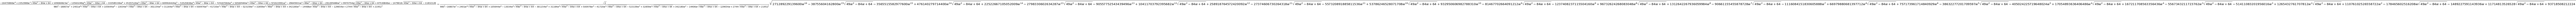

In [ ]:
#Problem 6
evals = eqn.eigenvals()
extract = list(evals.keys())
eval1 = extract[0]
eval1

In [ ]:
#Problem 7
w = Symbol('w')

list([eval1.subs(w,0.4), eval1.subs(w,0.7), eval1.subs(w,1.0)])

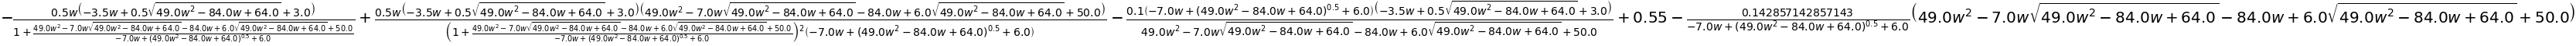

In [ ]:
#Problem 8
eqntrace = 0.5 * eqn.trace()
eqntrace

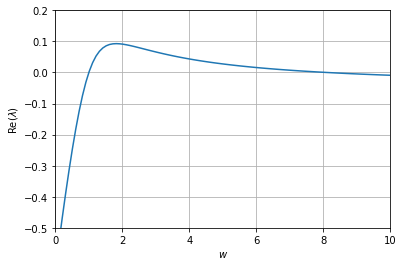

In [ ]:
#Problem 9
x = np.linspace(0,10,100)
arr = np.zeros(100)

for k in range(100):
  arr[k] = eqntrace.subs(w,(k-1)/9.9)
  #I used the formula x(k) = a + (k-1) * h, where h = (b-a)/(n-1). a and b are the endpoints of linspace and n is the 3rd argument of np.linspace

init_printing()
plt.xlabel('$w$')
plt.ylabel('Re($\lambda$)')
plt.xlim(0,10)
plt.ylim(-0.5,0.2)
plt.plot(x,arr)
plt.grid()

plt.show()

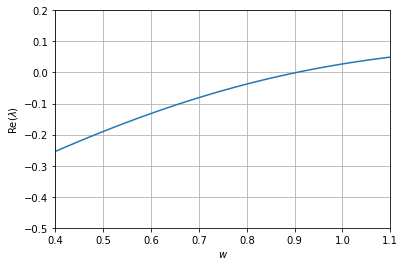

In [ ]:
#Problem 9 cont'd
x = np.linspace(0.4,1.1,100)
arr = np.zeros(100)

for k in range(100):
  arr[k] = eqntrace.subs(w,0.4+(k-1)*(.7/(99)))

init_printing()
plt.xlabel('$w$')
plt.ylabel('Re($\lambda$)')
plt.xlim(0.4,1.1)
plt.ylim(-0.5,0.2)
plt.plot(x,arr)
plt.grid()
plt.show()

In [ ]:
#Problem 10
hopf = solve(eqntrace,w)
hopf